In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [24]:
result_df = pd.read_csv('data/results.csv').replace("\\N", np.nan)
status_df = pd.read_csv('data/status.csv').replace("\\N", np.nan)
drivers_df = pd.read_csv('data/drivers.csv').replace("\\N", np.nan)
races_df = pd.read_csv('data/races.csv').replace("\\N", np.nan)
constructor_df = pd.read_csv('data/constructors.csv').replace("\\N", np.nan)
driver_standings_df = pd.read_csv('data/driver_standings.csv').replace("\\N", np.nan)
pit_stops_df = pd.read_csv('data/pit_stops.csv').replace("\\N", np.nan)
laps_df = pd.read_csv('data/lap_times.csv').replace("\\N", np.nan)
pd.get_option("display.max_columns",None)

In [3]:
result_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
result_df.dropna(inplace=True)
result_df.milliseconds = result_df.milliseconds.astype(int)
result_df.fastestLapSpeed = result_df.fastestLapSpeed.astype(float)
result_df.driverId = result_df.driverId.astype(int)


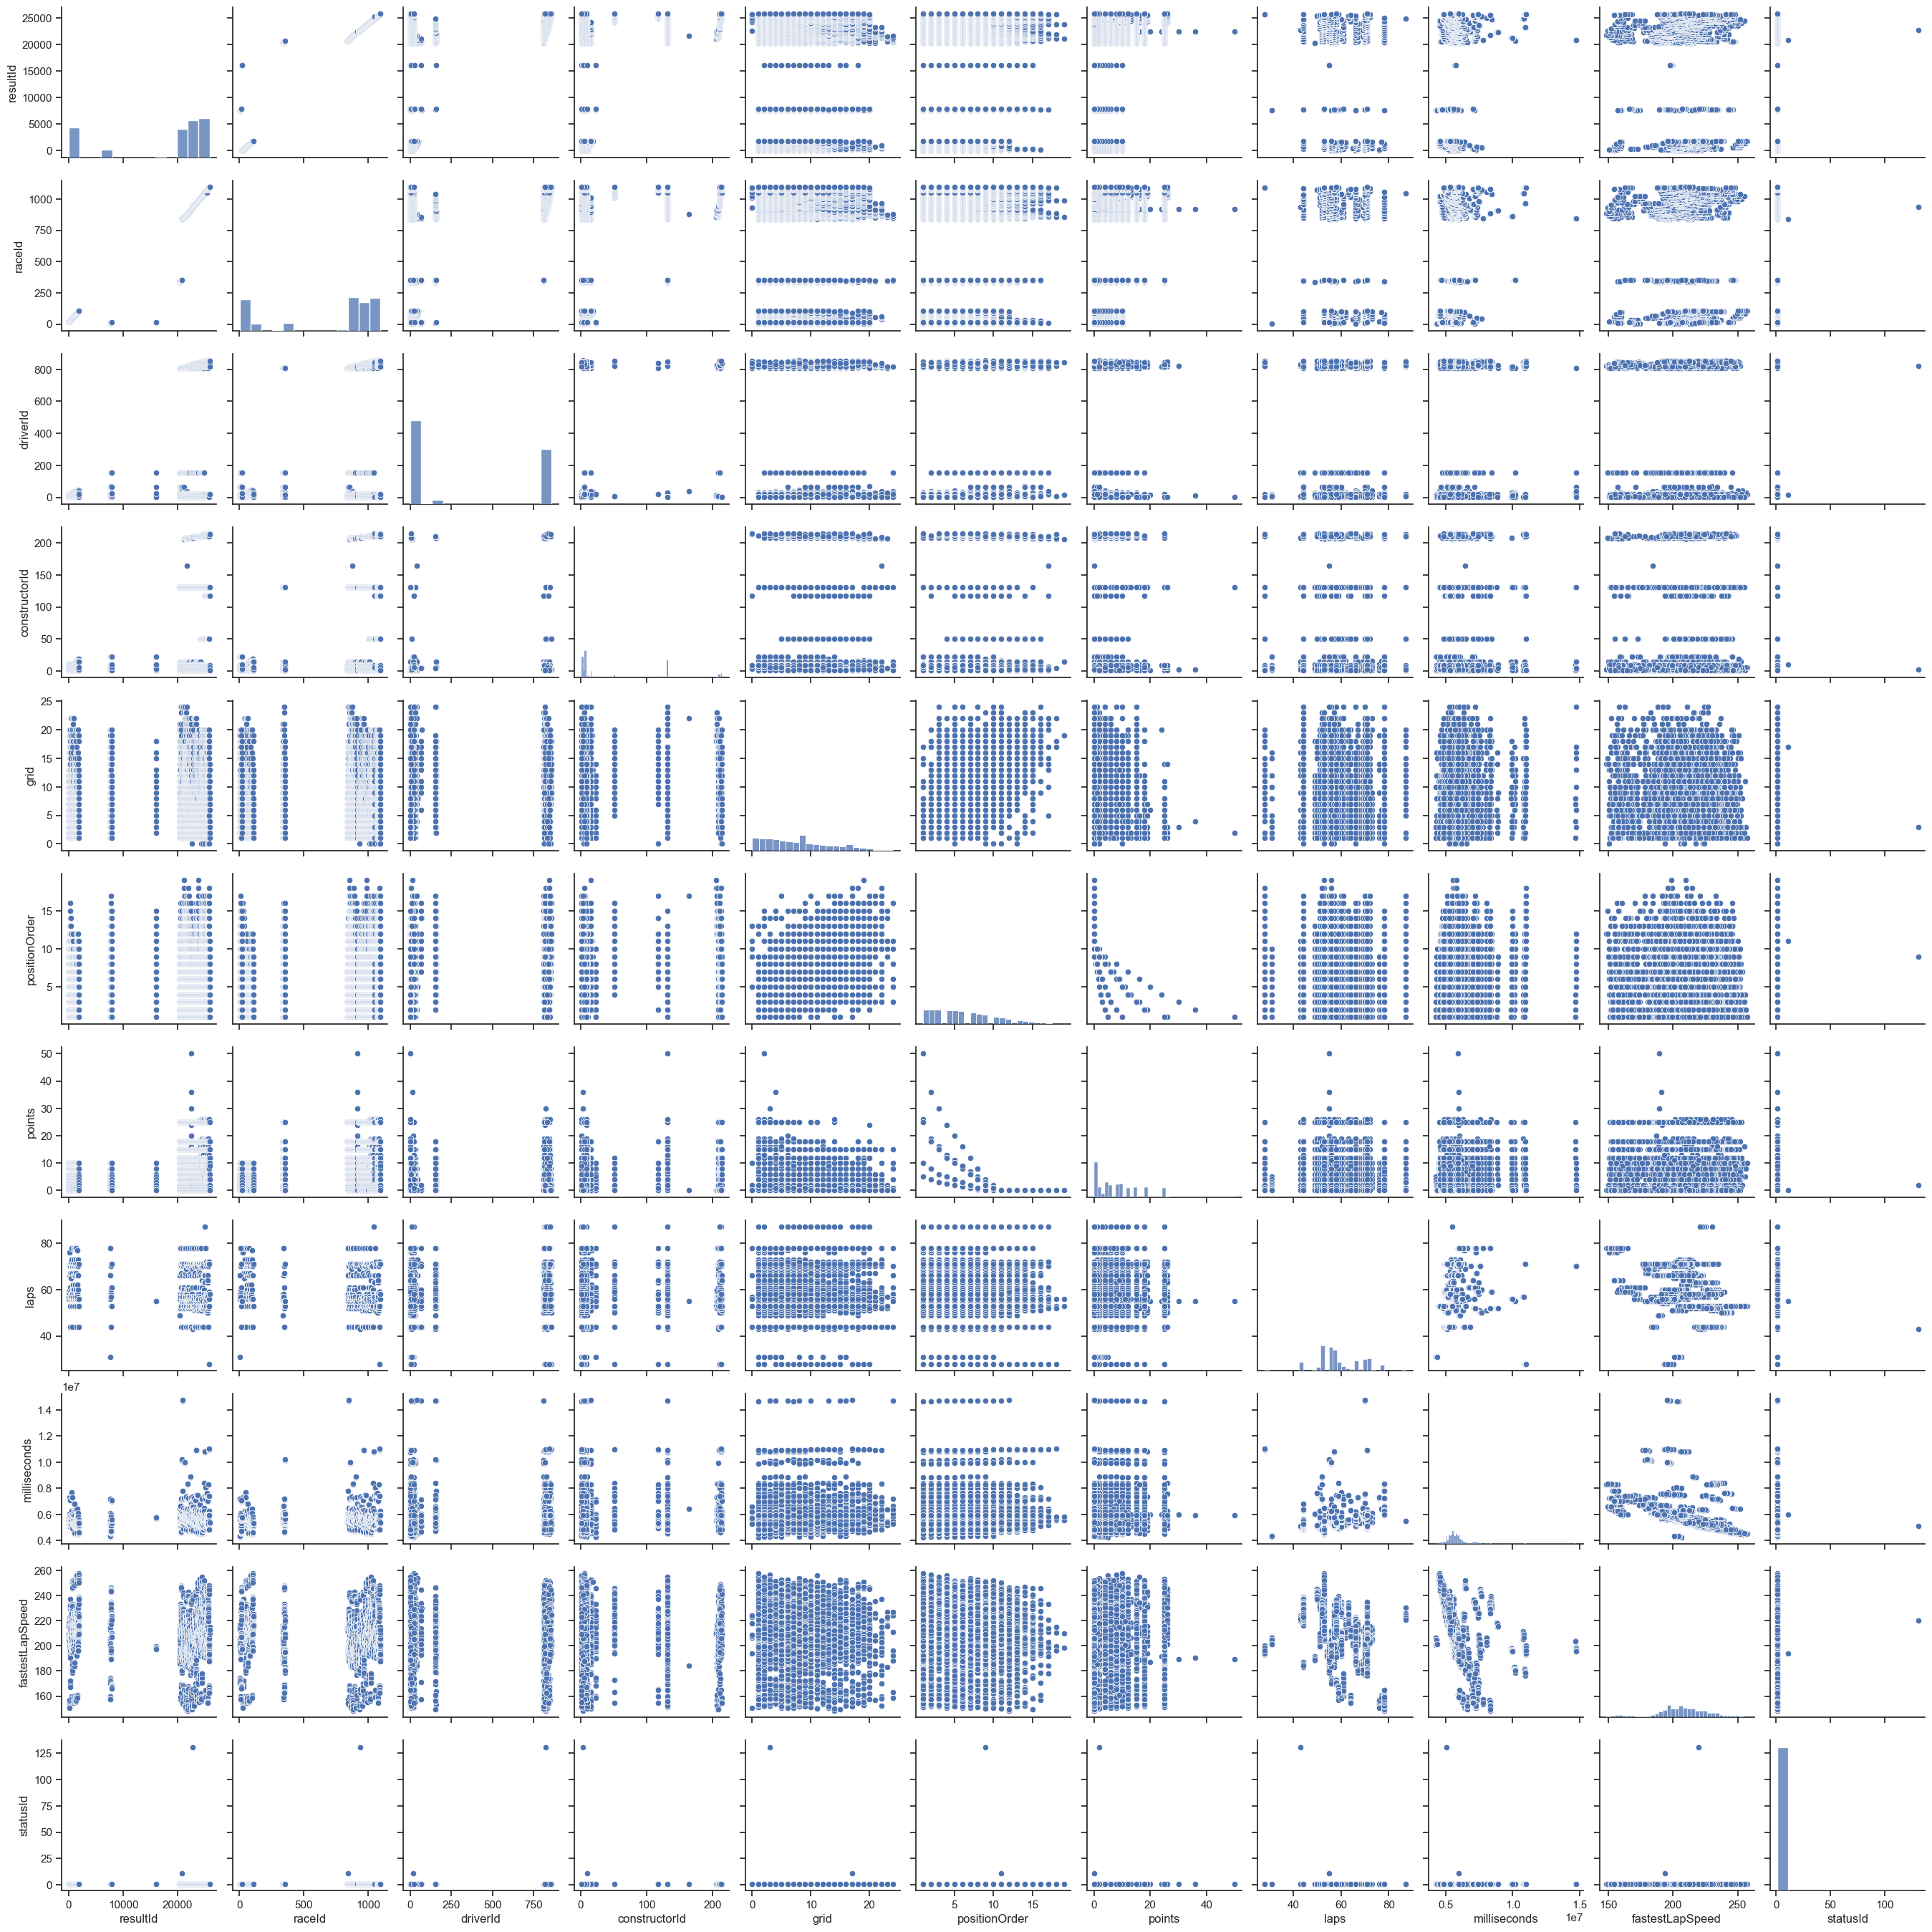

In [10]:
sns.set_theme(style="ticks")

sns.pairplot(result_df)

In [4]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [23]:
races_df.drop(['url','fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], axis=1, inplace=True)
races_df.head()

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


In [6]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [7]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [8]:
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [28]:
laps_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


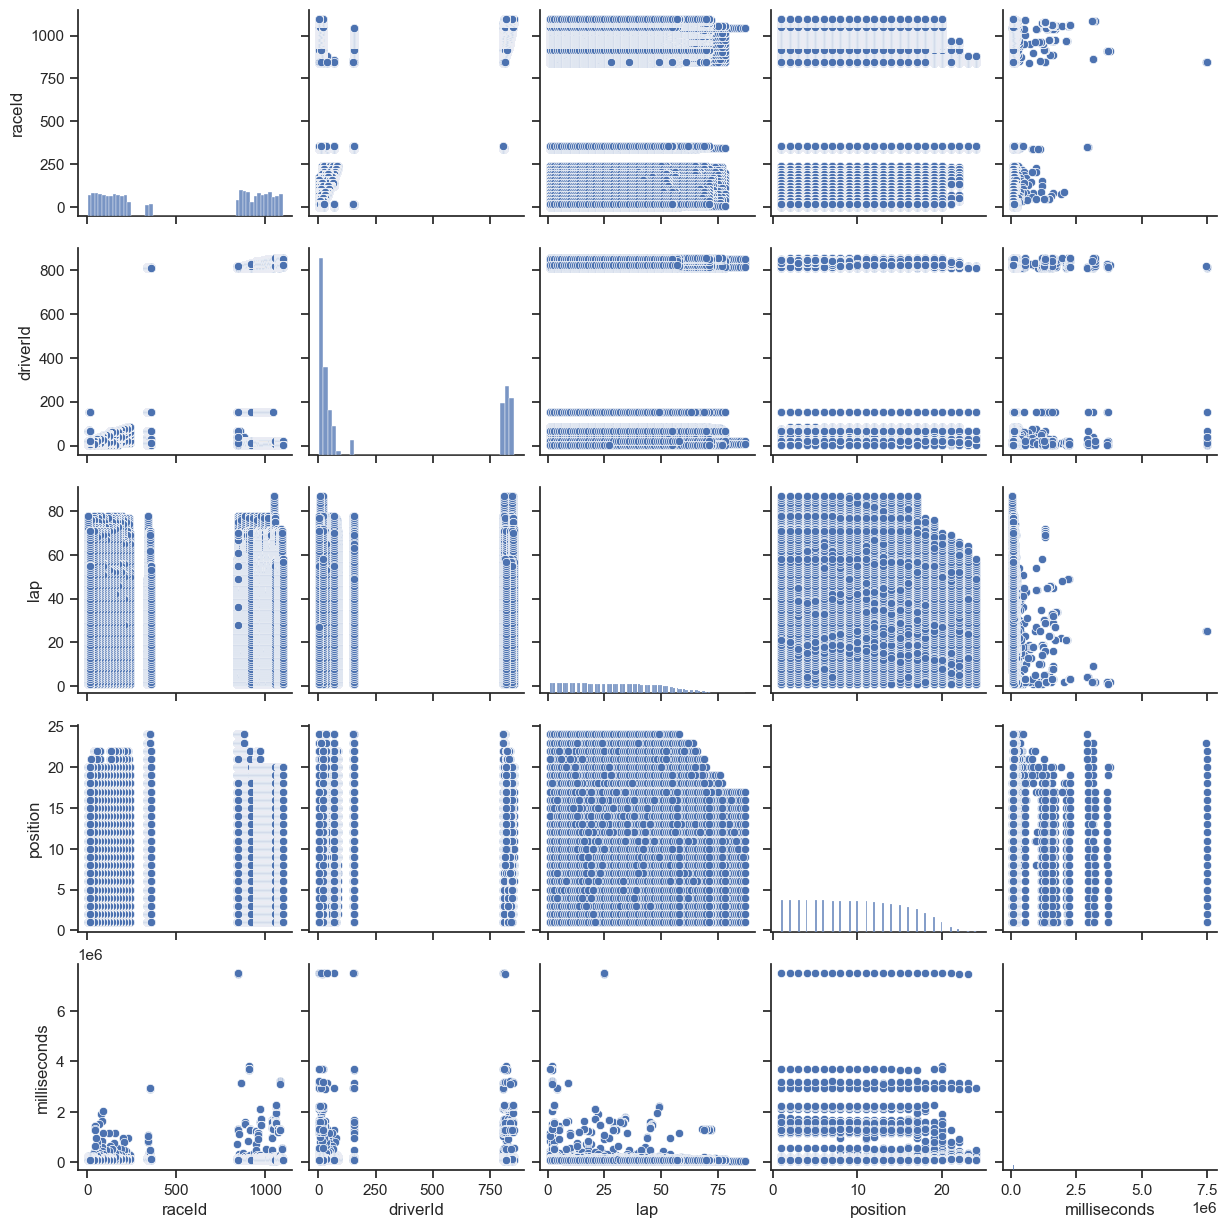

In [29]:
sns.pairplot(laps_df)

In [9]:
# showing this df has non-unique raceId/driverId pairs with multiple stops, each given their own row. 
pit_stops_df.loc[(pit_stops_df['raceId'] == 841) & (pit_stops_df['driverId'] == 153)]

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
18,841,153,2,17,17:31:06,24.463,24463
34,841,153,3,35,17:59:45,26.348,26348


In [10]:
# this cell gets the average and max for raceId/driverId pairs
pit_stops_averaged_df = pit_stops_df.groupby(["raceId", "driverId"])["milliseconds"].agg(["mean", "max", "min"]).reset_index()

pit_stops_averaged_df.head()

,raceId,driverId,mean,max,min
0,841,1,23213.0,23227,23199
1,841,2,24046.0,25098,22994
2,841,3,23716.0,23716,23716
3,841,4,24055.0,24733,23251
4,841,5,24865.0,24865,24865


In [11]:
# add total number of stops
df1 = pit_stops_df.groupby(["raceId", "driverId"])["stop"].max().reset_index()

pit_stops_averaged_df = pd.merge(pit_stops_averaged_df, df1, on=["raceId", "driverId"])

# rename the columns
pit_stops_averaged_df.rename(columns={'mean':'avg_pitstop','max':'longest_pitstop','min':'shortest_pitstop','stop':'pitstops'}, inplace=True)
pit_stops_averaged_df.head()

,raceId,driverId,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops
0,841,1,23213.0,23227,23199,2
1,841,2,24046.0,25098,22994,2
2,841,3,23716.0,23716,23716,1
3,841,4,24055.0,24733,23251,3
4,841,5,24865.0,24865,24865,1


In [12]:
# this cell takes the data from the pit stop csv and consolidates each raceId/driverId pair into its own row.
s = pit_stops_df.groupby(['raceId','driverId']).cumcount()

df1 = pit_stops_df.set_index(['raceId', 'driverId', s]).unstack().sort_index(level=1, axis=1)
df1.columns = [f'{x}{y}' for x, y in df1.columns]
pit_stops_consilidated_df = df1.reset_index()

In [13]:
# Probably shouldn't use this method. It has a lot of NaN values for those results where an nth pit stop wasn't even made.
pit_stops_consilidated_df.head()

,raceId,driverId,duration0,lap0,milliseconds0,stop0,time0,duration1,lap1,milliseconds1,stop1,time1,duration2,lap2,milliseconds2,stop2,time2,duration3,lap3,milliseconds3,stop3,time3,duration4,lap4,milliseconds4,stop4,time4,duration5,lap5,milliseconds5,stop5,time5
0,841,1,23.227,16.0,23227.0,1.0,17:28:24,23.199,36.0,23199.0,2.0,17:59:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,841,2,22.994,15.0,22994.0,1.0,17:27:41,25.098,30.0,25098.0,2.0,17:51:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,841,3,23.716,16.0,23716.0,1.0,17:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,841,4,23.251,12.0,23251.0,1.0,17:22:34,24.733,27.0,24733.0,2.0,17:46:04,24.181,42.0,24181.0,3.0,18:09:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,841,5,24.865,17.0,24865.0,1.0,17:31:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
races_df = races_df.raceId.astype(int)

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, constructor_df, on ='constructorId')
con4 = pd.merge(con3, pit_stops_averaged_df, on=['raceId','driverId'])
con4.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops
0,20780,841,1,1,3,2,2,2,2,18.0,58,+22.297,5392556,41,8,1:30.314,211.382,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23213.000000,23227,23199,2
1,20808,842,1,1,3,2,8,8,8,4.0,56,+1:09.957,5929789,54,5,1:41.512,196.575,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23252.750000,25382,22466,4
2,20825,843,1,1,3,3,1,1,1,25.0,56,1:36:58.226,5818226,48,2,1:40.415,195.424,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20659.333333,20878,20533,3
3,20852,844,1,1,3,4,4,4,4,12.0,58,+40.232,5457790,48,4,1:30.108,213.264,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,24909.250000,35688,20833,4
4,20874,845,1,1,3,3,2,2,2,18.0,66,+0.630,5943931,52,1,1:26.727,193.227,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20364.250000,20988,19761,4


In [15]:
df = pd.merge(con4, status_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

# df is the full dataframe to freely drop from:

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops,status
0,20780,841,1,1,3,2,2,2,2,18.0,58,+22.297,5392556,41,8,1:30.314,211.382,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23213.000000,23227,23199,2,Finished
1,20808,842,1,1,3,2,8,8,8,4.0,56,+1:09.957,5929789,54,5,1:41.512,196.575,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,23252.750000,25382,22466,4,Finished
2,20825,843,1,1,3,3,1,1,1,25.0,56,1:36:58.226,5818226,48,2,1:40.415,195.424,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20659.333333,20878,20533,3,Finished
3,20852,844,1,1,3,4,4,4,4,12.0,58,+40.232,5457790,48,4,1:30.108,213.264,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,24909.250000,35688,20833,4,Finished
4,20874,845,1,1,3,3,2,2,2,18.0,66,+0.630,5943931,52,1,1:26.727,193.227,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20364.250000,20988,19761,4,Finished


In [16]:
def time_str_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split(":"))
    return minutes * 60 + seconds

In [17]:
# this is something I think would be more useful

df_truncated = df.drop(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'positionText', 'time', 'rank', 'statusId', 'driverRef', 'number_y', 'code', 'nationality_x', 'url_x', 'constructorRef', 'url_y'], axis=1)
df_truncated['driver_name'] = df_truncated['forename']+' '+df['surname']
df_truncated = df_truncated.drop(['forename','surname'], axis=1)
df_truncated = df_truncated[df_truncated['status'] == "Finished"]
df_truncated = df_truncated.drop('status', axis=1)

df_truncated['dob'] = pd.to_datetime(df_truncated['dob'])
from datetime import datetime
dates = datetime.today()-df_truncated['dob']
age = dates.dt.days/365
df_truncated['age'] = round(age)
df_truncated = df_truncated.drop('dob', axis=1)

df_truncated = df_truncated.drop([1956])
df_truncated['fastestLapTime'] = df_truncated['fastestLapTime'].map(lambda x: time_str_to_seconds(x))

df_truncated.tail()

,grid,position,positionOrder,points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,name,nationality_y,avg_pitstop,longest_pitstop,shortest_pitstop,pitstops,driver_name,age
2477,19,10,10,1.0,56,6202606,49,101.243,196.031,AlphaTauri,Italian,2.346450e+04,23688,23241,2,Yuki Tsunoda,23.0
2478,11,11,11,0.0,58,5355285,40,89.489,212.446,AlphaTauri,Italian,2.192650e+04,22262,21591,2,Yuki Tsunoda,23.0
2479,17,12,12,0.0,56,6727980,50,108.173,183.472,Manor Marussia,British,3.002667e+04,37748,25812,3,Alexander Rossi,32.0
2480,19,15,15,0.0,71,10921833,69,87.919,176.439,Manor Marussia,British,1.172984e+06,2008464,25509,3,Pascal Wehrlein,29.0
2481,22,12,12,0.0,71,10907144,47,87.796,176.686,Manor Marussia,British,1.747072e+06,2009052,1485092,2,Esteban Ocon,27.0
